<a href="https://colab.research.google.com/github/MaheshJillela/Sentiment_Analysis/blob/main/Sentiment_Analysis_Of_Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Data processing,csv file I/O
import numpy as np
#Linear algebra
import pandas as pd
from google.colab import drive
#Connecting google drive with google colab
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
#Loading the data
df=pd.read_csv("/content/drive/MyDrive/Project Dataset.csv") #Loading the data
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [12]:

#Importing essential libraries for performing natural language processing on restaurant review dataset
import nltk #natural language toolkit
import re #inbuilt package called re
nltk.download('stopwords') #nltk corpus is a massive dunp of all kinds of data sets
from nltk.corpus import stopwords #it is used to ignore  special characters like (a,an,the,in)
from nltk.stem.porter import PorterStemmer #It is a stemmer which is mainly known for data mining and information retrival

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Cleaing the reviews
corpus = []
for i in range(0,1000): #having 1000 records
#cleaning special characters from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=str(df['Review'][i])) #The re.sub() method performs global search and global replace on the data
  review = review.lower() #Converting the review into the lowercase
  review_words=review.split() #Tokenizing the review by words
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))] #Removing the stopwords
  ps=PorterStemmer() #Streaming the stop words
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review) #Joining the stemmed words
  corpus.append(review) #Creating a corpus

In [15]:
#Creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values


In [16]:
#Uses the data into test data and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)


In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [18]:
#Fitting Naive Bayes to the training set
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
#Fit the training data
classifier.fit(x_train,y_train)

MultinomialNB()

In [19]:
#Prediciting the test set results
y_pred = classifier.predict(x_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [20]:
#Accuracy,Precision,Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("-------score-------")
print("Accuracy score is :{}%".format(round(score1*100,2)))
print("Precision score is :{}%".format(round(score2*100,2)))
print("Recall score is :{}%".format(round(score3*100,2)))

-------score-------
Accuracy score is :75.5%
Precision score is :75.0%
Recall score is :78.64%


In [21]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Actual Values')

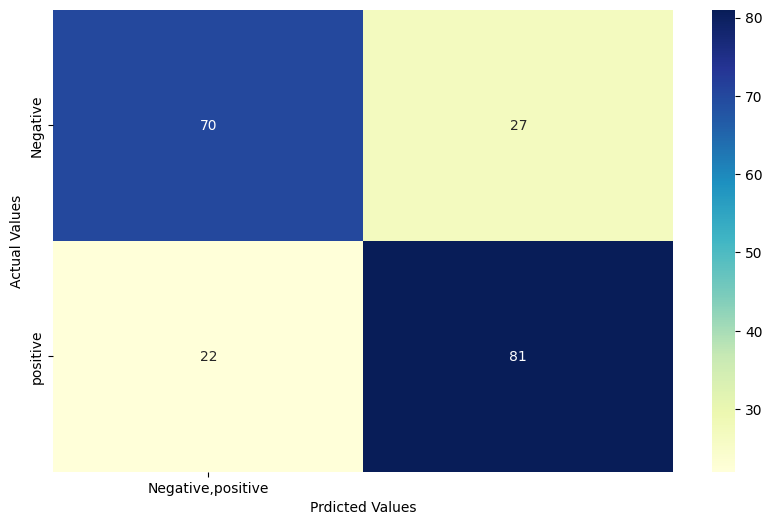

In [22]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt #It is a graph plotting library in python
import seaborn as sns #It is a data visualization library in python
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative,positive"],yticklabels=["Negative","positive"])
plt.xlabel("Prdicted Values")
plt.ylabel("Actual Values")

In [23]:
#Hyperparameter tuning the Naive Bayes classifier
from nltk.tag.api import accuracy
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit (x_train,y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha = {} is : {}%".format(round(i,1),round(score*200,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("---------------------------")
print("The best accuracy is{}% with alpha value as {} ".format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha = 0.1 is : 155.0%
Accuracy score for alpha = 0.2 is : 156.0%
Accuracy score for alpha = 0.3 is : 155.0%
Accuracy score for alpha = 0.4 is : 155.0%
Accuracy score for alpha = 0.5 is : 153.0%
Accuracy score for alpha = 0.6 is : 153.0%
Accuracy score for alpha = 0.7 is : 153.0%
Accuracy score for alpha = 0.8 is : 151.0%
Accuracy score for alpha = 0.9 is : 151.0%
Accuracy score for alpha = 1.0 is : 151.0%
---------------------------
The best accuracy is78.0% with alpha value as 0.2 


In [24]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.2)

In [25]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [26]:
# Predicted values
sample_review = 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')

This is a NEGATIVE review


In [32]:
# Predicted values
sample_review = 'Good service, very clean, and inexpensive, to boot!'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')

This is a POSITIVE review


In [33]:
# Predicted values
sample_review = 'I hope this place sticks around.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')

This is a POSITIVE review


In [37]:
# Predicted values
sample_review = 'The chicken wings contained the driest chicken meat I have ever eaten.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')

This is a NEGATIVE review
